In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_file(path):
#     df = pd.read_csv(path,delimiter = '\t',skiprows = [0,1,2,3])
    df = pd.read_csv(path,delimiter = '\t')
    return df

In [3]:
raw_data = read_file("data_expression_median.txt")

In [4]:
def preprocessing(df):
    # reset column name and drop all row Nan value
    df = df.T
    df = df.iloc[3:,:]
    df = df.dropna()
    df.iloc[:,0:24368] = df.iloc[:,0:24368].astype('float64')
    return df

In [5]:
df = preprocessing(raw_data)

In [6]:
clinical_data = pd.read_csv("clinical_train.csv")

In [7]:
merged = pd.merge(left=df,right=clinical_data, left_on=df.index, right_on='PATIENT_ID')

In [8]:
X = merged.iloc[:,0:24368].values
y = merged[['Y_label']].values

In [17]:
#Test train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=800)
X_train = pca.fit_transform(X_train)
print(X_train.shape)
X_test = pca.transform(X_test)
print(X_test.shape)


(896, 800)
(225, 800)


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc 
from sklearn import preprocessing

/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Bill7/anaconda3/lib/python3.7/site-packages/sklearn/m

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}


<Figure size 432x288 with 0 Axes>

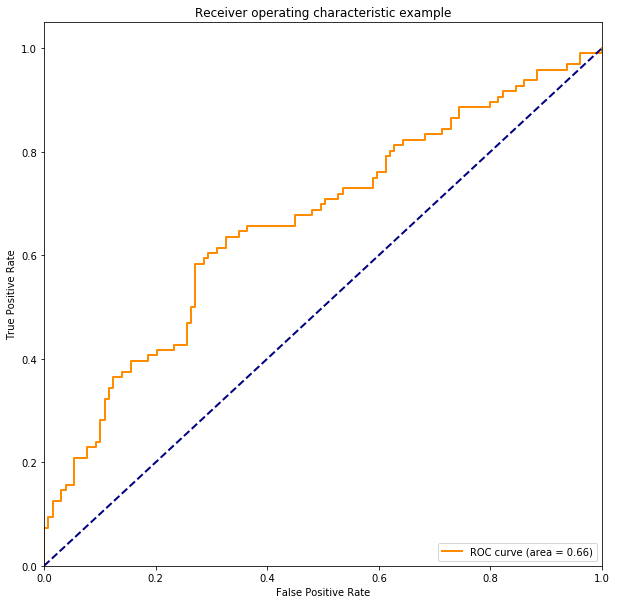

In [22]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10]}]

# Grid Search
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='f1')
clf.fit(X_train, np.ravel(y_train))

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

y_score = clf.decision_function(X_test)

# Plot ROC AUC Curve
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [123]:
#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,np.ravel(y_train))

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test)


In [124]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test,columns=['y_test'])
comparison['y_predicted'] = y_pred
#comparison

In [ ]:
#principalDf = pd.DataFrame(data = principalComponents)
#finalDf = pd.concat([principalDf, y], axis = 1)
